In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sns.set_style("dark")
sns.set(rc={'figure.figsize':(12,8)})

In [73]:
pd.set_option('display.max_rows', 40)

In [74]:
df = pd.read_csv('owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [75]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
133798,ZWE,Africa,Zimbabwe,2021-11-12,133329.0,0.0,31.000,4694.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
133799,ZWE,Africa,Zimbabwe,2021-11-13,133393.0,64.0,32.143,4696.0,2.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
133800,ZWE,Africa,Zimbabwe,2021-11-14,133428.0,35.0,34.429,4696.0,0.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
133801,ZWE,Africa,Zimbabwe,2021-11-15,133438.0,10.0,33.286,4697.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
133802,ZWE,Africa,Zimbabwe,2021-11-16,133505.0,67.0,37.571,4698.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133803 entries, 0 to 133802
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    133803 non-null  object 
 1   continent                                   125264 non-null  object 
 2   location                                    133803 non-null  object 
 3   date                                        133803 non-null  object 
 4   total_cases                                 126445 non-null  float64
 5   new_cases                                   126443 non-null  float64
 6   new_cases_smoothed                          125400 non-null  float64
 7   total_deaths                                115288 non-null  float64
 8   new_deaths                                  115484 non-null  float64
 9   new_deaths_smoothed                         125400 non-null  float64
 

In [77]:
drop_cols = ['iso_code', 'total_cases','new_cases_smoothed', 'total_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 
            'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million',
            'new_deaths_smoothed_per_million', 'icu_patients_per_million', 'hosp_patients_per_million',
            'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million', 'total_tests',
            'total_tests_per_thousand','new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
            'total_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 
            'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 
            'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 
            'new_people_vaccinated_smoothed_per_hundred', 'excess_mortality_cumulative_absolute',
            'excess_mortality_cumulative', 'excess_mortality_cumulative_per_million', 'weekly_hosp_admissions', 
            'weekly_icu_admissions', 'tests_units', 'tests_per_case']
df.drop(drop_cols, axis=1, inplace=True)

In [78]:
df.head()

,continent,location,date,new_cases,new_deaths,reproduction_rate,icu_patients,hosp_patients,new_tests,positive_rate,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,Asia,Afghanistan,2020-02-24,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,Asia,Afghanistan,2020-02-25,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,Asia,Afghanistan,2020-02-26,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,Asia,Afghanistan,2020-02-27,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,Asia,Afghanistan,2020-02-28,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133803 entries, 0 to 133802
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   continent                   125264 non-null  object 
 1   location                    133803 non-null  object 
 2   date                        133803 non-null  object 
 3   new_cases                   126443 non-null  float64
 4   new_deaths                  115484 non-null  float64
 5   reproduction_rate           104981 non-null  float64
 6   icu_patients                15984 non-null   float64
 7   hosp_patients               18724 non-null   float64
 8   new_tests                   55918 non-null   float64
 9   positive_rate               63582 non-null   float64
 10  people_vaccinated           32262 non-null   float64
 11  people_fully_vaccinated     29280 non-null   float64
 12  total_boosters              6096 non-null    float64
 13  new_vaccinatio

In [80]:
# pd.set_option('display.min_rows', 70)
# pd.set_option('display.max_rows', 100)
df.isna().sum()

continent                       8539
location                           0
date                               0
new_cases                       7360
new_deaths                     18319
reproduction_rate              28822
icu_patients                  117819
hosp_patients                 115079
new_tests                      77885
positive_rate                  70221
people_vaccinated             101541
people_fully_vaccinated       104523
total_boosters                127707
new_vaccinations              105662
stringency_index               24495
population                       952
population_density             12716
median_age                     18426
aged_65_older                  19702
aged_70_older                  19056
gdp_per_capita                 17676
extreme_poverty                56157
cardiovasc_death_rate          18199
diabetes_prevalence            14386
female_smokers                 43744
male_smokers                   45046
handwashing_facilities         75615
h

In [81]:
df[df['new_cases'].isna()]

,continent,location,date,new_cases,new_deaths,reproduction_rate,icu_patients,hosp_patients,new_tests,positive_rate,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
1275,Europe,Albania,2020-02-25,NaN,NaN,NaN,NaN,NaN,8.0,NaN,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1276,Europe,Albania,2020-02-26,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1277,Europe,Albania,2020-02-27,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1278,Europe,Albania,2020-02-28,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
1279,Europe,Albania,2020-02-29,NaN,NaN,NaN,NaN,NaN,8.0,NaN,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131331,Oceania,Wallis and Futuna,2021-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN,NaN
131332,Oceania,Wallis and Futuna,2021-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN,NaN
131333,Oceania,Wallis and Futuna,2021-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN,NaN
131334,Oceania,Wallis and Futuna,2021-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN,NaN


In [82]:
df.loc[df['new_cases'].isna() , ['new_cases']] = 0.0

In [83]:
df[df['new_deaths'].isna()]

,continent,location,date,new_cases,new_deaths,reproduction_rate,icu_patients,hosp_patients,new_tests,positive_rate,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,Asia,Afghanistan,2020-02-24,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,Asia,Afghanistan,2020-02-25,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,Asia,Afghanistan,2020-02-26,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,Asia,Afghanistan,2020-02-27,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,Asia,Afghanistan,2020-02-28,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132600,Africa,Zambia,2020-03-31,0.0,NaN,NaN,NaN,NaN,45.0,0.076,...,57.5,234.499,3.94,3.1,24.7,13.938,2.0,63.89,0.584,NaN
132601,Africa,Zambia,2020-04-01,1.0,NaN,NaN,NaN,NaN,120.0,0.048,...,57.5,234.499,3.94,3.1,24.7,13.938,2.0,63.89,0.584,NaN
133196,Africa,Zimbabwe,2020-03-20,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
133197,Africa,Zimbabwe,2020-03-21,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [84]:
df.loc[df['new_deaths'].isna() , ['new_deaths']] = 0.0

In [85]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133803 entries, 0 to 133802
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   continent                   125264 non-null  string 
 1   location                    133803 non-null  string 
 2   date                        133803 non-null  string 
 3   new_cases                   133803 non-null  Int64  
 4   new_deaths                  133803 non-null  Int64  
 5   reproduction_rate           104981 non-null  Float64
 6   icu_patients                15984 non-null   Int64  
 7   hosp_patients               18724 non-null   Int64  
 8   new_tests                   55918 non-null   Int64  
 9   positive_rate               63582 non-null   Float64
 10  people_vaccinated           32262 non-null   Float64
 11  people_fully_vaccinated     29280 non-null   Float64
 12  total_boosters              6096 non-null    Int64  
 13  new_vaccinatio

In [86]:
df['date'] = pd.to_datetime(df['date'])

In [87]:
df[df.continent.isna()].location.unique()

<StringArray>
[             'Africa',                'Asia',              'Europe',
      'European Union',         'High income',       'International',
          'Low income', 'Lower middle income',       'North America',
             'Oceania',       'South America', 'Upper middle income',
               'World']
Length: 13, dtype: string

In [88]:
df['continent'].unique()

<StringArray>
['Asia', <NA>, 'Europe', 'Africa', 'North America', 'South America',
 'Oceania']
Length: 7, dtype: string

In [89]:
# df[df['location'] == 'Low income']
# df[df['location'] == 'International']
# df[df['location'] == 'Lower middle income']
# df[df['location'] == 'Upper middle income']
# df[df['location'] == 'High income']
# df[df['location'] == 'European Union']
df[df['location'] == 'Oceania']
# df[df['location'] == 'North America']
#df[df['location'] == 'World']

,continent,location,date,new_cases,new_deaths,reproduction_rate,icu_patients,hosp_patients,new_tests,positive_rate,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
90731,<NA>,Oceania,2020-01-25,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
90732,<NA>,Oceania,2020-01-26,4,0,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
90733,<NA>,Oceania,2020-01-27,1,0,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
90734,<NA>,Oceania,2020-01-28,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
90735,<NA>,Oceania,2020-01-29,1,0,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91388,<NA>,Oceania,2021-11-12,1918,19,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
91389,<NA>,Oceania,2021-11-13,1528,5,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
91390,<NA>,Oceania,2021-11-14,1292,13,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
91391,<NA>,Oceania,2021-11-15,1300,26,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [90]:
df_unknown_continents = df.copy(deep=True)

In [91]:
def fill_continent(row):
    loc = row['location']
    if loc == 'Asia' or loc == 'Africa' or loc == 'Europe' or loc == 'Oceania' or loc == 'South America' or loc == 'North America':
        return row['location']
    elif loc == 'European Union':
        return 'Europe'
    elif loc == 'High income' or loc == 'International' or loc == 'Low income' or loc == 'Lower middle income' or loc == 'Upper middle income' or loc == 'World':
        return 'UNKNOWN'
    else:
        return row['continent']

In [92]:
df_unknown_continents['continent'] = df_unknown_continents.apply(fill_continent, axis=1)

In [93]:
df_unknown_continents['continent'].unique()

array(['Asia', 'Africa', 'Europe', 'North America', 'South America',
       'Oceania', 'UNKNOWN'], dtype=object)

In [94]:
df_case_death = df_unknown_continents[['continent', 'location', 'date', 'new_cases', 'new_deaths']]

In [95]:
df_case_death.describe()

,new_cases,new_deaths
count,133803.00000,133803.000000
mean,7908.42218,158.539786
std,42414.55412,810.782710
min,-74347.00000,-1918.000000
25%,1.00000,0.000000
50%,76.00000,1.000000
75%,953.00000,15.000000
max,907780.00000,18007.000000


In [96]:
df_case_death.describe(exclude=['Int64'])

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_1492/1719806888.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_case_death.describe(exclude=['Int64'])


,continent,location,date
count,133803,133803,133803
unique,7,237,686
top,Africa,Peru,2021-06-23 00:00:00
freq,33722,686,234
first,NaN,NaN,2020-01-01 00:00:00
last,NaN,NaN,2021-11-16 00:00:00


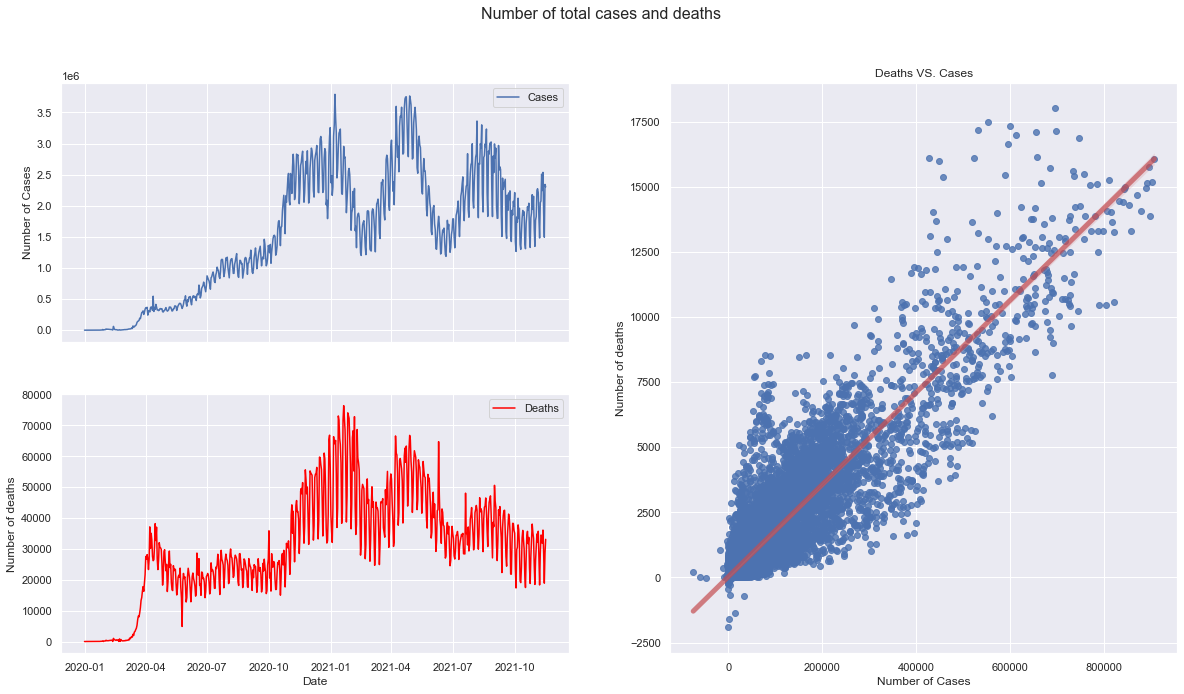

In [97]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)
fig.set_size_inches(20, 10.5)
fig.suptitle('Number of total cases and deaths', fontsize=16)

plt.subplot(2,2,1)
df_case = df_case_death[['date', 'new_cases']]
df_plt = df_case.groupby(df_case['date'].dt.date).sum()
df_plt.reset_index(inplace=True)
df_plt['date'] = pd.to_datetime(df_plt['date'])
df_plt.sort_values(by='date', inplace=True)
sns.lineplot(data=df_plt, x='date', y='new_cases', label='Cases')
ax[0][0].set_ylabel('Number of Cases')

plt.subplot(2,2,3)
df_death = df_case_death[['date', 'new_deaths']]
df_plt2 = df_death.groupby(df_death['date'].dt.date).sum()
df_plt2.reset_index(inplace=True)
df_plt2['date'] = pd.to_datetime(df_plt2['date'])
df_plt2.sort_values(by='date', inplace=True)
sns.lineplot(data=df_plt2, x='date', y='new_deaths', color='red', label='Deaths') 
ax[1][0].set_xlabel('Date')
ax[1][0].set_ylabel('Number of deaths')

plt.subplot(1,2,2)
sns.regplot(x=df_case_death['new_cases'].astype('float64'),
            y=df_case_death['new_deaths'].astype('float64'),
            line_kws={"color":"r","alpha":0.7,"lw":5},
            )
ax2 = plt.gca()
ax2.set_ylabel('Number of deaths')
ax2.set_xlabel('Number of Cases')
ax2.set_title('Deaths VS. Cases')
plt.show()

In [98]:
df_cont = df_case_death[df_case_death['continent'] != 'UNKNOWN']
df_cont['continent'].unique()

array(['Asia', 'Africa', 'Europe', 'North America', 'South America',
       'Oceania'], dtype=object)

Text(0.5, 0, 'Number of total deaths')

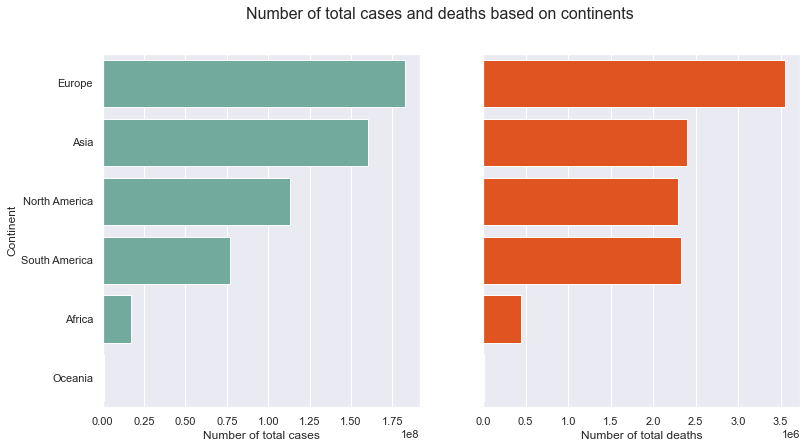

In [99]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.set_size_inches(12.5, 6.5)
fig.suptitle('Number of total cases and deaths based on continents', fontsize=16)

df_cont_case_death = df_cont[['continent', 'new_cases', 'new_deaths']]

df_cont_case_death = df_cont_case_death.groupby('continent').sum()
df_cont_case_death.reset_index(inplace=True)
df_cont_case_death = df_cont_case_death.sort_values(['new_cases'], ascending=False).reset_index(drop=True)
sns.barplot(data=df_cont_case_death, x='new_cases', y='continent', ci=None, color='#69b3a2', ax=ax1)
ax1.set_ylabel('Continent')
ax1.set_xlabel('Number of total cases')

sns.barplot(data=df_cont_case_death, x='new_deaths', y='continent', ci=None, color='orangered', ax=ax2)
ax2.set_ylabel(None)
ax2.set_xlabel('Number of total deaths')


Note: South and North America diferences in cases and deaths and diffrences between scales

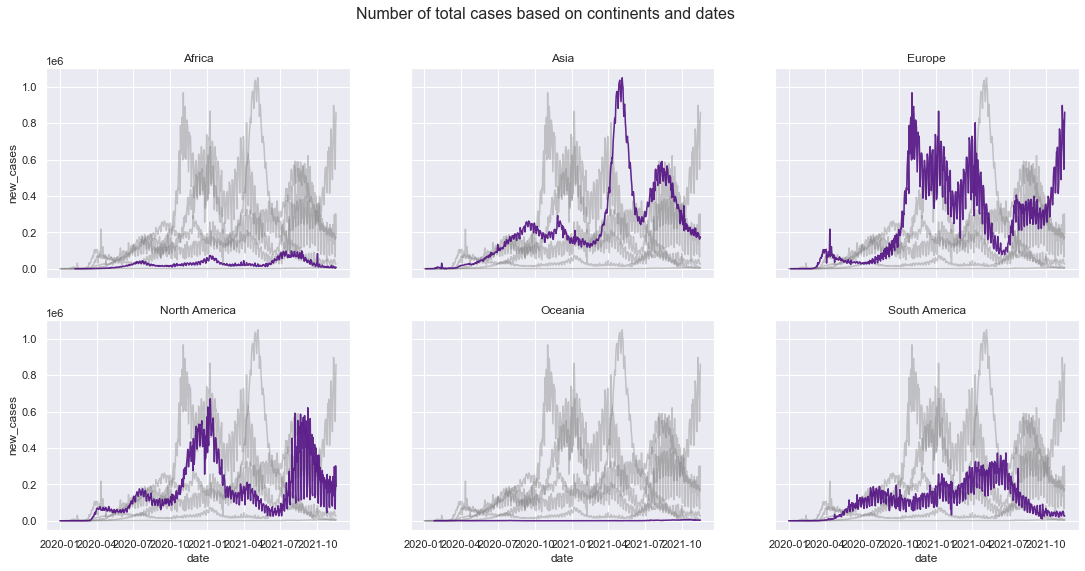

In [100]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True)
fig.set_size_inches(18.5, 8.5)
fig.suptitle('Number of total cases based on continents and dates', fontsize=16)

df_cont_no_loc = df_cont[['continent', 'date', 'new_cases', 'new_deaths']]

df_cont_no_loc = df_cont_no_loc.groupby(['continent', 'date']).sum()
df_cont_no_loc.reset_index(inplace=True)

i = j = 0
for index, continent in enumerate(df_cont_no_loc.continent.unique()):
    palette = {'grey' for c in df_cont_no_loc.continent.unique()}
    sns.lineplot(data=df_cont_no_loc, x='date', y='new_cases', hue='continent', palette=palette, ax=ax[i][j], alpha=0.4)
    sns.lineplot(data=df_cont_no_loc[df_cont_no_loc['continent'] == continent], x='date', y='new_cases', ax=ax[i][j], alpha=0.8, color='indigo')
    ax[i][j].get_legend().remove()
    ax[i][j].set_title(continent)
    j += 1
    if j == 3:
        i += 1
        j = 0

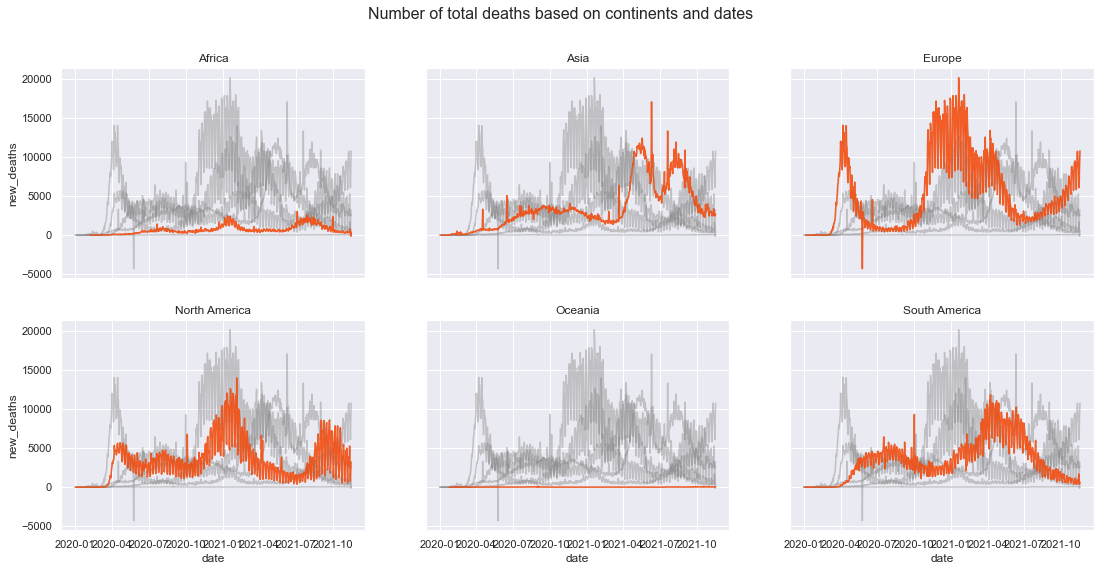

In [101]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True)
fig.set_size_inches(18.5, 8.5)
fig.suptitle('Number of total deaths based on continents and dates', fontsize=16)

i = j = 0
for index, continent in enumerate(df_cont_no_loc.continent.unique()):
    palette = {'grey' for c in df_cont_no_loc.continent.unique()}
    sns.lineplot(data=df_cont_no_loc, x='date', y='new_deaths', hue='continent', palette=palette, ax=ax[i][j], alpha=0.4)
    sns.lineplot(data=df_cont_no_loc[df_cont_no_loc['continent'] == continent], x='date', y='new_deaths', ax=ax[i][j], alpha=0.8, color='orangered')
    ax[i][j].get_legend().remove()
    ax[i][j].set_title(continent)
    j += 1
    if j == 3:
        i += 1
        j = 0

Fixing outlier

In [102]:
df_cont_fix = df_cont_no_loc.drop(df_cont_no_loc[df_cont_no_loc['new_deaths'] < 0].index, axis=0)

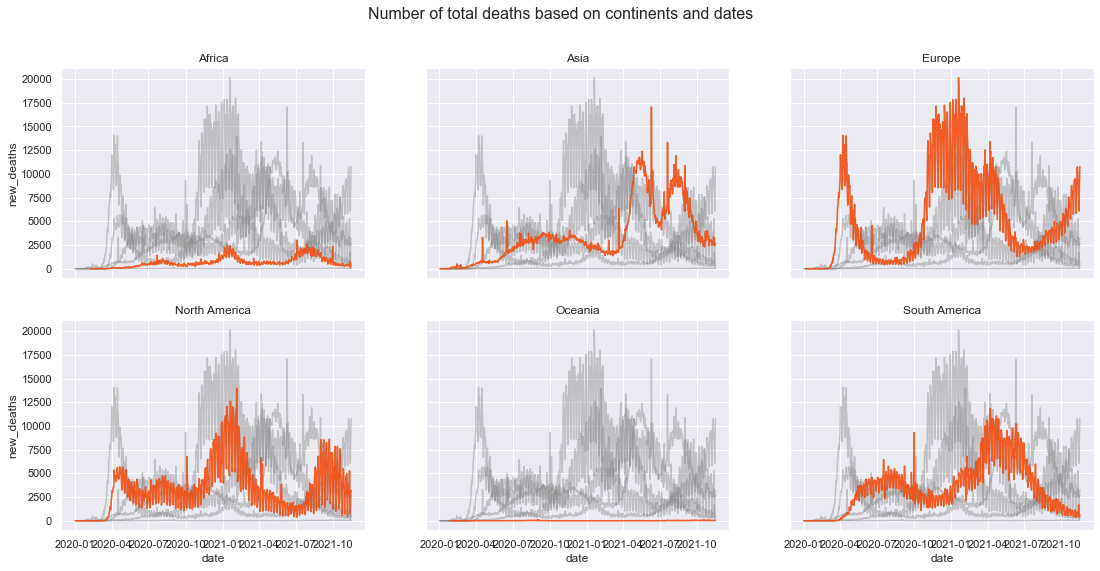

In [103]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True)
fig.set_size_inches(18.5, 8.5)
fig.suptitle('Number of total deaths based on continents and dates', fontsize=16)

i = j = 0
for index, continent in enumerate(df_cont_fix.continent.unique()):
    palette = {'grey' for c in df_cont_fix.continent.unique()}
    sns.lineplot(data=df_cont_fix, x='date', y='new_deaths', hue='continent', palette=palette, ax=ax[i][j], alpha=0.4)
    sns.lineplot(data=df_cont_fix[df_cont_fix['continent'] == continent], x='date', y='new_deaths', ax=ax[i][j], alpha=0.8, color='orangered')
    ax[i][j].get_legend().remove()
    ax[i][j].set_title(continent)
    j += 1
    if j == 3:
        i += 1
        j = 0

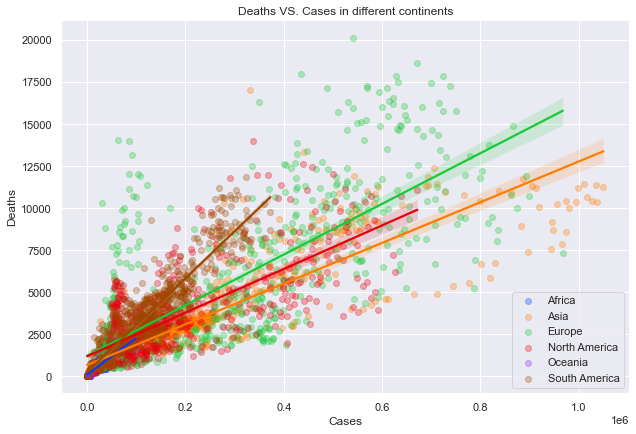

In [104]:
df_cont_fix['new_cases'] = df_cont_fix['new_cases'].astype('float64')
df_cont_fix['new_deaths'] = df_cont_fix['new_deaths'].astype('float64')
sns.lmplot(data=df_cont_fix, x='new_cases', y='new_deaths', hue='continent',
           fit_reg=True, legend=False, height=6, aspect=6/4, palette='bright', scatter_kws={'alpha': 0.3})
ax = plt.gca()
ax.set_xlabel('Cases')
ax.set_ylabel('Deaths')
ax.set_title('Deaths VS. Cases in different continents')
plt.legend(loc='lower right')
plt.show()

In [105]:
drop_locs = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'International',
            'Low income', 'Lower middle income', 'North America', 'Oceania', 'South America',
            'Upper middle income','World']

In [106]:
df_loc = df_case_death[['location', 'date', 'new_cases', 'new_deaths']]
df_top_loc = df_loc[['location', 'new_cases', 'new_deaths']]
df_top_loc = df_top_loc.groupby('location').sum()
df_top_loc.sort_values(by='new_cases', inplace=True, ascending = False)

df_top_loc['death_per_case'] = df_top_loc['new_deaths'] / df_top_loc['new_cases']

df_top_loc.drop(drop_locs, axis=0, inplace=True)
top_locs_cases = df_top_loc.head(10)
top_locs_cases


,new_cases,new_deaths,death_per_case
location,,,
United States,47309007,765811,0.016187
India,34466598,464153,0.013467
Brazil,21815578,611478,0.028029
United Kingdom,9686363,143598,0.014825
Russia,8991748,253009,0.028138
France,7762020,119225,0.01536
Turkey,7635864,73973,0.009688
Iran,6051642,128406,0.021218
Argentina,5308781,116294,0.021906


Text(0.5, 0, 'Ratio')

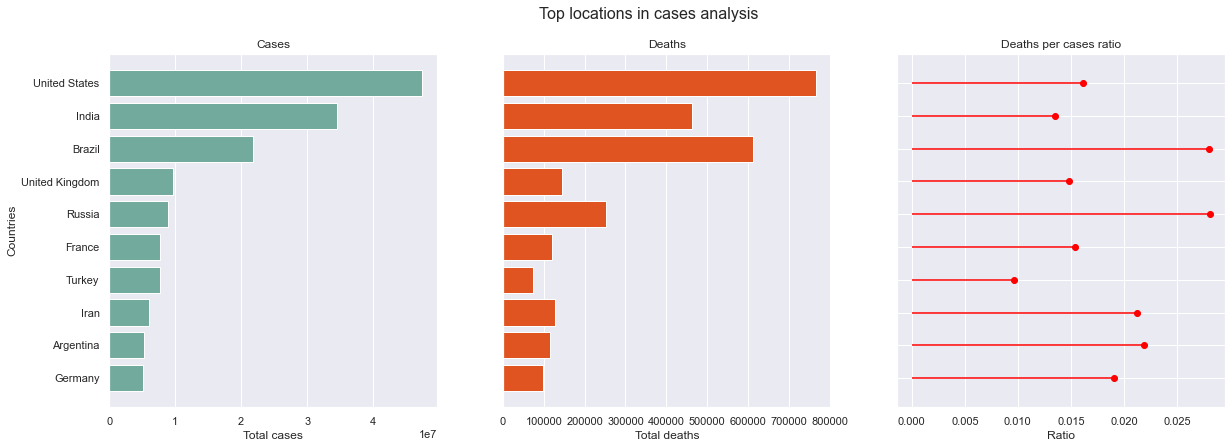

In [107]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
fig.set_size_inches(20, 6.5)
fig.suptitle('Top locations in cases analysis', fontsize=16)

top_locs_cases_plt = top_locs_cases.reset_index()
sns.barplot(data=top_locs_cases_plt, x='new_cases', y='location', color='#69b3a2', ax=ax[0])
ax[0].set_title('Cases')
ax[0].set_xlabel('Total cases')
ax[0].set_ylabel('Countries')


sns.barplot(data=top_locs_cases_plt, x='new_deaths', y='location', color='orangered', ax=ax[1])
ax[1].set_title('Deaths')
ax[1].set_xlabel('Total deaths')
ax[1].set_ylabel(None)

plt.hlines(y=top_locs_cases_plt['location'], xmin=0, xmax=top_locs_cases_plt['death_per_case'], color='red')
plt.scatter(x=top_locs_cases_plt['death_per_case'], y=top_locs_cases_plt['location'], marker="o", color='red')
ax[2].set_title('Deaths per cases ratio')
ax[2].set_xlabel('Ratio')

Text(0.5, 0, 'Ratio')

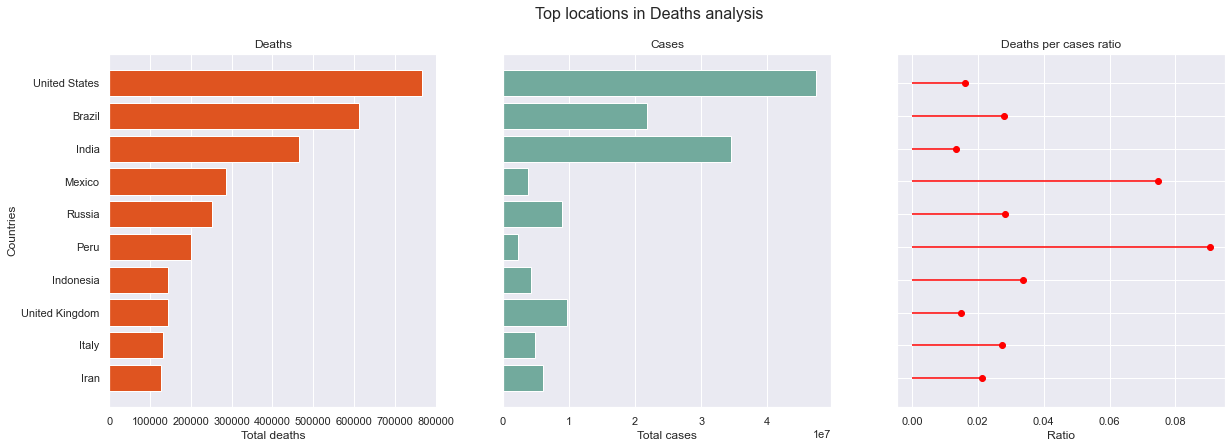

In [108]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
fig.set_size_inches(20, 6.5)
fig.suptitle('Top locations in Deaths analysis', fontsize=16)

df_top_loc.sort_values(by='new_deaths', inplace=True, ascending = False)
top_locs_deaths = df_top_loc.head(10)
top_locs_deaths_plt = top_locs_deaths.reset_index()

sns.barplot(data=top_locs_deaths_plt, x='new_deaths', y='location', color='orangered', ax=ax[0])
ax[0].set_title('Deaths')
ax[0].set_xlabel('Total deaths')
ax[0].set_ylabel('Countries')

sns.barplot(data=top_locs_deaths_plt, x='new_cases', y='location', color='#69b3a2', ax=ax[1])
ax[1].set_title('Cases')
ax[1].set_xlabel('Total cases')
ax[1].set_ylabel(None)

plt.hlines(y=top_locs_deaths_plt['location'], xmin=0, xmax=top_locs_deaths_plt['death_per_case'], color='red')
plt.scatter(x=top_locs_deaths_plt['death_per_case'], y=top_locs_deaths_plt['location'], marker="o", color='red')
ax[2].set_title('Deaths per cases ratio')
ax[2].set_xlabel('Ratio')

In [109]:
worst_locs = ['United States', 'Brazil', 'United Kingdom', 'Russia', 'Iran'] # countries which are placed in boths highest new cases and deaths

In [110]:
df.drop(df[df['continent'].isna()].index, axis=0, inplace=True)
df.drop(df[df['location'].isin(drop_locs)].index, axis=0, inplace=True)
df.continent.unique()

<StringArray>
['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']
Length: 6, dtype: string

In [111]:
df.reset_index(drop=True)
df.isna().sum()

continent                          0
location                           0
date                               0
new_cases                          0
new_deaths                         0
reproduction_rate              20941
icu_patients                  109280
hosp_patients                 106540
new_tests                      69346
positive_rate                  61682
people_vaccinated              96857
people_fully_vaccinated        99674
total_boosters                121429
new_vaccinations              100943
stringency_index               15956
population                       303
population_density              4842
median_age                     10552
aged_65_older                  11828
aged_70_older                  11182
gdp_per_capita                  9802
extreme_poverty                48283
cardiovasc_death_rate          10325
diabetes_prevalence             6512
female_smokers                 35870
male_smokers                   37172
handwashing_facilities         67741
h

In [112]:
df_production = df.copy(deep=True)
df_production[df_production['reproduction_rate'].isna()]
df_production.drop(df[df_production['reproduction_rate'].isna()].index, axis=0, inplace=True)
df_production.reset_index(drop=True, inplace=True)
df_production[['new_cases', 'new_deaths', 'reproduction_rate', 'population']].describe()

,new_cases,new_deaths,reproduction_rate,population
count,104323.000000,104323.00000,104323.000000,1.043230e+05
mean,2403.899782,48.45710,0.998049,4.571276e+07
std,11839.122348,206.92128,0.340977,1.600913e+08
min,-74347.000000,-1918.00000,-0.030000,3.401000e+04
25%,9.000000,0.00000,0.830000,2.973462e+06
50%,136.000000,2.00000,1.000000,1.016792e+07
75%,967.000000,15.00000,1.170000,3.335942e+07
max,414188.000000,7374.00000,6.000000,1.444216e+09


In [113]:
df_production.isna().sum()

continent                          0
location                           0
date                               0
new_cases                          0
new_deaths                         0
reproduction_rate                  0
icu_patients                   88523
hosp_patients                  85823
new_tests                      50731
positive_rate                  43180
people_vaccinated              78284
people_fully_vaccinated        80989
total_boosters                100688
new_vaccinations               81520
stringency_index                6690
population                         0
population_density              1687
median_age                      3202
aged_65_older                   4338
aged_70_older                   3803
gdp_per_capita                  3851
extreme_poverty                34603
cardiovasc_death_rate           2296
diabetes_prevalence             1725
female_smokers                 23166
male_smokers                   24360
handwashing_facilities         53344
h

<AxesSubplot:xlabel='new_deaths', ylabel='reproduction_rate'>

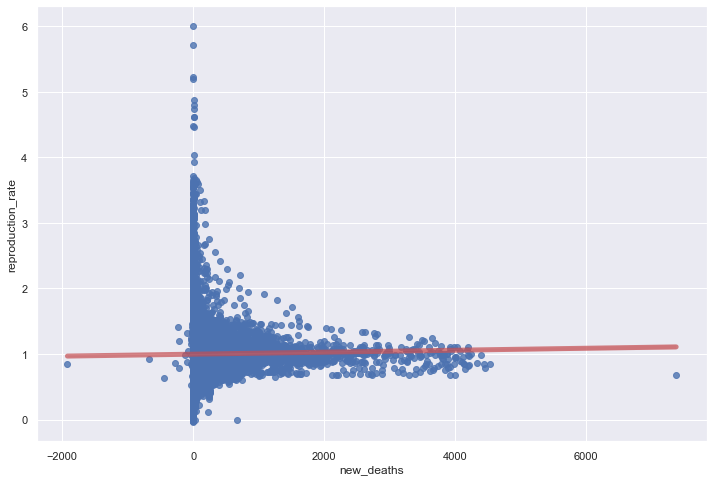

In [114]:
sns.regplot(x=df_production['new_deaths'].astype('float64'),
            y=df_production['reproduction_rate'].astype('float64'),
            line_kws={"color":"r","alpha":0.7,"lw":5},
            )

In [115]:
df_hosp = df[['continent', 'location', 'date', 'new_cases', 'new_deaths', 'hosp_patients', 'icu_patients']]
df_hosp.isna().sum()

continent             0
location              0
date                  0
new_cases             0
new_deaths            0
hosp_patients    106540
icu_patients     109280
dtype: int64

In [116]:
df_hosp[df_hosp['icu_patients'].isna()]

,continent,location,date,new_cases,new_deaths,hosp_patients,icu_patients
0,Asia,Afghanistan,2020-02-24,5,0,<NA>,<NA>
1,Asia,Afghanistan,2020-02-25,0,0,<NA>,<NA>
2,Asia,Afghanistan,2020-02-26,0,0,<NA>,<NA>
3,Asia,Afghanistan,2020-02-27,0,0,<NA>,<NA>
4,Asia,Afghanistan,2020-02-28,0,0,<NA>,<NA>
...,...,...,...,...,...,...,...
133798,Africa,Zimbabwe,2021-11-12,0,0,<NA>,<NA>
133799,Africa,Zimbabwe,2021-11-13,64,2,<NA>,<NA>
133800,Africa,Zimbabwe,2021-11-14,35,0,<NA>,<NA>
133801,Africa,Zimbabwe,2021-11-15,10,1,<NA>,<NA>


In [117]:
df_hosp.fillna(0, inplace=True)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [118]:
df_hosp_date = df_hosp.drop(['continent', 'location'], axis=1).groupby('date').sum()
df_hosp_date.sort_index(ascending=True, inplace=True)
df_hosp_date.reset_index(inplace=True)
df_hosp_date.head()

,date,new_cases,new_deaths,hosp_patients,icu_patients
0,2020-01-01,0,0,0,0
1,2020-01-02,0,0,0,0
2,2020-01-03,0,0,0,0
3,2020-01-04,0,0,0,0
4,2020-01-05,0,0,0,0


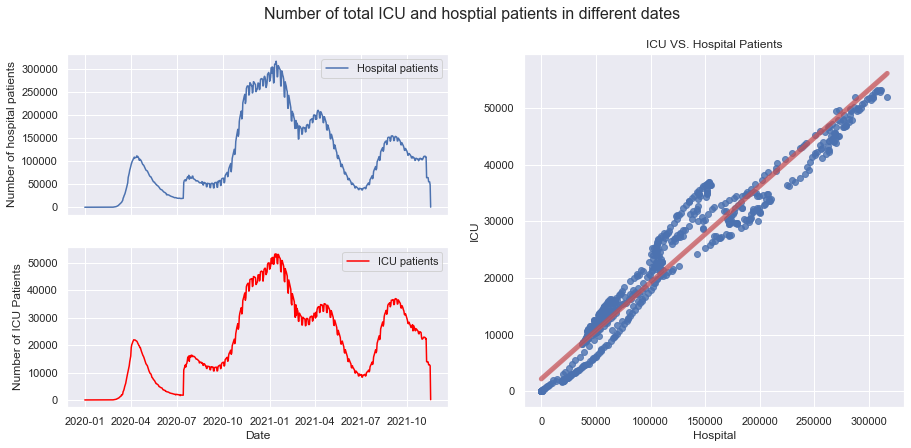

In [119]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)
fig.set_size_inches(15, 6.5)
fig.suptitle('Number of total ICU and hosptial patients in different dates', fontsize=16)

plt.subplot(2,2,1)
df_hosp_date['date'] = pd.to_datetime(df_hosp_date['date'])
df_hosp_date.sort_values(by='date', inplace=True)
sns.lineplot(data=df_hosp_date, x='date', y='hosp_patients', label='Hospital patients')
ax[0][0].set_ylabel('Number of hospital patients')

plt.subplot(2,2,3)
sns.lineplot(data=df_hosp_date, x='date', y='icu_patients', color='red', label='ICU patients') 
ax[1][0].set_xlabel('Date')
ax[1][0].set_ylabel('Number of ICU Patients')

plt.subplot(1,2,2)
sns.regplot(x=df_hosp_date['hosp_patients'].astype('float64'),
            y=df_hosp_date['icu_patients'].astype('float64'),
            line_kws={"color":"r","alpha":0.7,"lw":5},
            )
ax2 = plt.gca()
ax2.set_ylabel('ICU')
ax2.set_xlabel('Hospital')
ax2.set_title('ICU VS. Hospital Patients')
plt.show()

In [120]:
df_hosp_cont = df_hosp.drop(['date', 'location'], axis=1).groupby('continent').sum()
df_hosp_cont.reset_index(inplace=True)
df_hosp_cont

,continent,new_cases,new_deaths,hosp_patients,icu_patients
0,Africa,8566590,220963,0,13023
1,Asia,80042101,1198637,2765185,334967
2,Europe,69610937,1365515,44781948,6744938
3,North America,56727071,1146347,27613766,7212250
4,Oceania,287659,3073,0,0
5,South America,38521446,1163397,0,0


C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_1492/1075938318.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hosp_cont['icu_per_hosp'] = df_hosp_cont['icu_patients'] / df_hosp_cont['hosp_patients']


Text(0, 0.5, '')

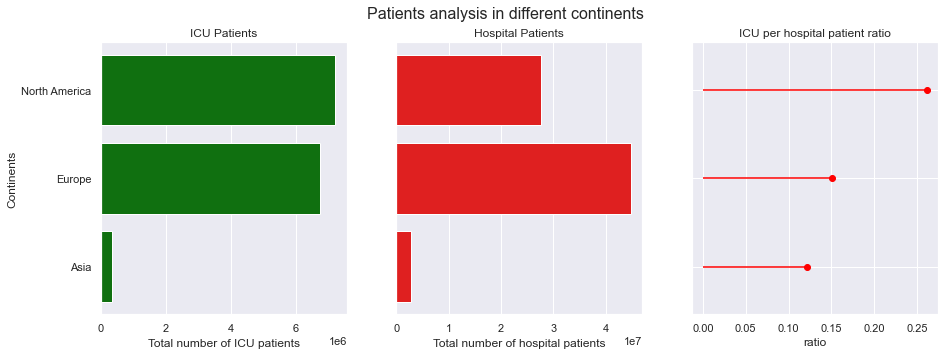

In [121]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)
fig.set_size_inches(15, 5)
fig.suptitle('Patients analysis in different continents', fontsize=16)

df_hosp_cont = df_hosp_cont[df_hosp_cont['continent'].isin(['Asia', 'Europe', 'North America'])]
df_hosp_cont.sort_values(by='icu_patients', inplace=True, ascending=False)

sns.barplot(data=df_hosp_cont, x='icu_patients', y='continent', color='green', ax=ax[0])
ax[0].set_title('ICU Patients')
ax[0].set_xlabel('Total number of ICU patients')
ax[0].set_ylabel('Continents')

sns.barplot(data=df_hosp_cont, x='hosp_patients', y='continent', color='red', ax=ax[1])
ax[1].set_title('Hospital Patients')
ax[1].set_xlabel('Total number of hospital patients')
ax[1].set_ylabel(None)

df_hosp_cont['icu_per_hosp'] = df_hosp_cont['icu_patients'] / df_hosp_cont['hosp_patients']
plt.hlines(y=df_hosp_cont['continent'], xmin=0, xmax=df_hosp_cont['icu_per_hosp'], color='red')
plt.scatter(x=df_hosp_cont['icu_per_hosp'], y=df_hosp_cont['continent'], marker="o", color='red')
ax[2].set_title('ICU per hospital patient ratio')
ax[2].set_xlabel('ratio')
ax[2].set_ylabel(None)


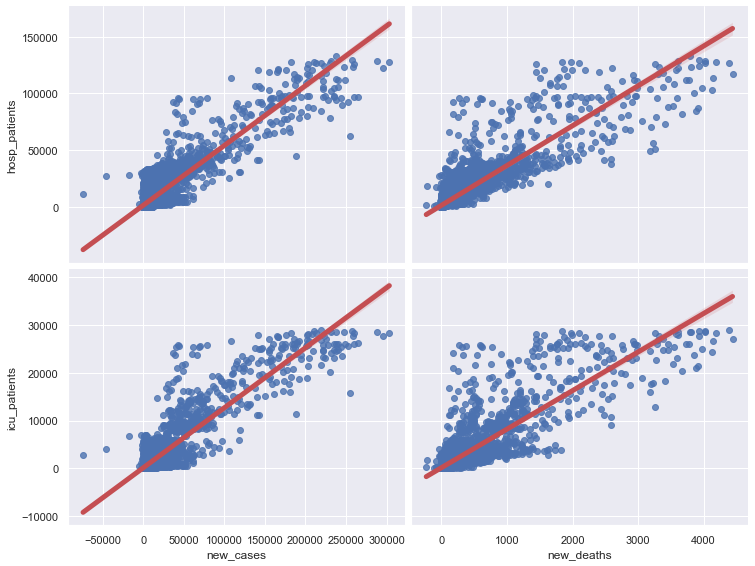

In [122]:
df_hosp_pair = df_hosp.drop(['continent', 'date', 'location'], axis=1)
df_hosp_pair['new_deaths'] = df_hosp_pair['new_deaths'].astype('float64')
df_hosp_pair['new_cases'] = df_hosp_pair['new_cases'].astype('float64')
df_hosp_pair['hosp_patients'] = df_hosp_pair[df_hosp_pair['hosp_patients'] > 0]['hosp_patients'].astype('float64')
df_hosp_pair['icu_patients'] = df_hosp_pair[df_hosp_pair['icu_patients'] > 0]['icu_patients'].astype('float64')
sns.pairplot(df_hosp_pair, x_vars=['new_cases', 'new_deaths'], y_vars=['hosp_patients', 'icu_patients'],
            height=4, aspect=4/3, kind='reg', plot_kws={'line_kws': {"color":"r", "lw":5}})

In [123]:
df_test = df[['continent', 'date', 'new_tests', 'positive_rate']]
df_test.isna().sum()

continent            0
date                 0
new_tests        69346
positive_rate    61682
dtype: int64

In [124]:
df_test.fillna(0, inplace=True)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


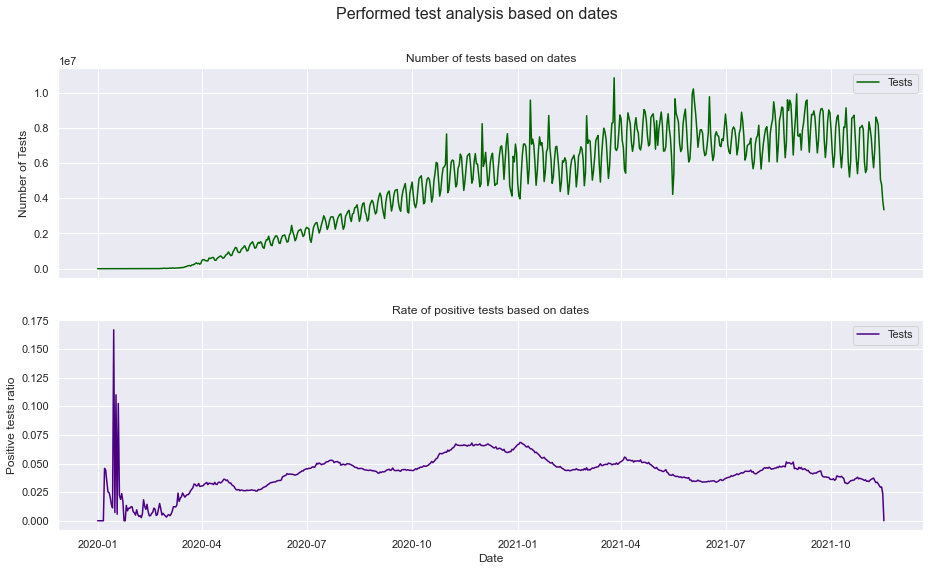

In [125]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
fig.set_size_inches(15.5, 8.5)
fig.suptitle('Performed test analysis based on dates', fontsize=16)

df_test_date = df_test.drop(['continent', 'positive_rate'], axis=1).groupby('date').sum()
df_test_date.reset_index(inplace=True)
df_test_date['date'] = pd.to_datetime(df_test_date['date'])
df_test_date.sort_values(by='date', inplace=True)
sns.lineplot(data=df_test_date, x='date', y='new_tests', label='Tests', ax=ax[0], color='darkgreen')
ax[0].set_ylabel('Number of Tests')
ax[0].set_xlabel(None)
ax[0].set_title('Number of tests based on dates')

df_ratio_date = df_test.drop(['continent', 'new_tests'], axis=1).groupby('date').mean()
df_ratio_date.reset_index(inplace=True)
df_ratio_date['date'] = pd.to_datetime(df_ratio_date['date'])
df_ratio_date.sort_values(by='date', inplace=True)
sns.lineplot(data=df_ratio_date, x='date', y='positive_rate', label='Tests', ax=ax[1], color='indigo')
ax[1].set_ylabel('Positive tests ratio')
ax[1].set_xlabel('Date')
ax[1].set_title('Rate of positive tests based on dates')

plt.show()

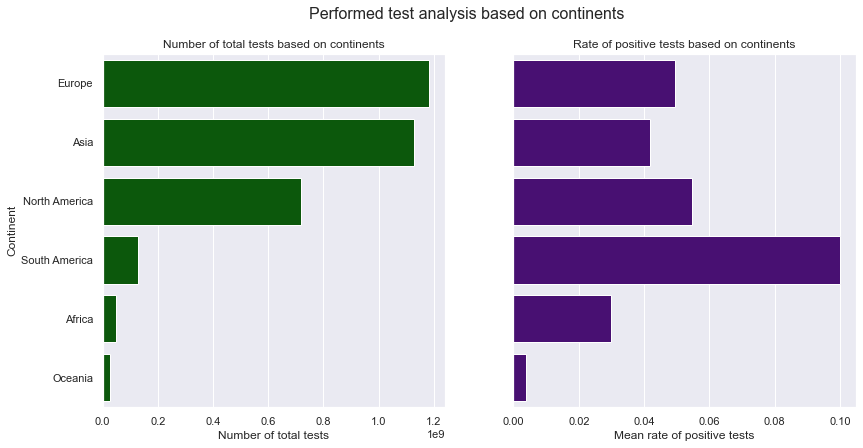

In [126]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.set_size_inches(13.5, 6.5)
fig.suptitle('Performed test analysis based on continents', fontsize=16)

df_test_cont = df_test.drop(['date', 'positive_rate'], axis=1).groupby('continent').sum()
df_test_cont.reset_index(inplace=True)
df_test_cont.sort_values(by='new_tests', inplace=True, ascending=False)
sns.barplot(data=df_test_cont, x='new_tests', y='continent', label='Tests', ax=ax[0], color='darkgreen')
ax[0].set_ylabel('Continent')
ax[0].set_xlabel('Number of total tests')
ax[0].set_title('Number of total tests based on continents')

df_ratio_cont = df_test.drop(['date', 'new_tests'], axis=1).groupby('continent').mean()
df_ratio_cont.reset_index(inplace=True)
sns.barplot(data=df_ratio_cont, x='positive_rate', y='continent', label='Tests', ax=ax[1], color='indigo', 
            order=['Europe', 'Asia', 'North America', 'South America', 'Africa', 'Oceania'])
ax[1].set_ylabel(None)
ax[1].set_xlabel('Mean rate of positive tests')
ax[1].set_title('Rate of positive tests based on continents')

plt.show()

In [127]:
df_vacc = df[['continent', 'location', 'date', 'new_cases', 'new_deaths', 'new_vaccinations',
              'people_vaccinated', 'people_fully_vaccinated', 'total_boosters']]
df_vacc.isna().sum()

continent                       0
location                        0
date                            0
new_cases                       0
new_deaths                      0
new_vaccinations           100943
people_vaccinated           96857
people_fully_vaccinated     99674
total_boosters             121429
dtype: int64

In [128]:
df_vacc.fillna(0, inplace=True)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [135]:
import datetime
df_vacc = df_vacc[df_vacc['date'] >= pd.Timestamp(2021, 1, 1)]

Text(0.5, 1.0, 'Vaccinations')

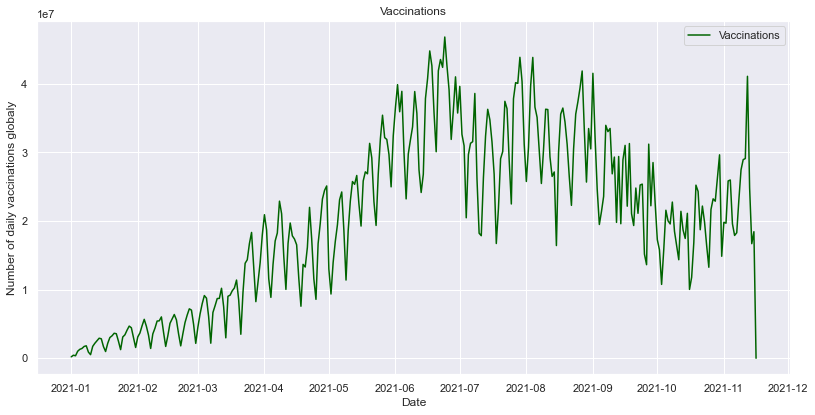

In [136]:
df_vacc_date = df_vacc[['date', 'new_cases', 'new_deaths', 'new_vaccinations']].groupby('date').sum()
df_vacc_date.reset_index(inplace=True)

ax = plt.gca()
plt.gcf().set_size_inches(13.5, 6.5)
df_vacc_date['date'] = pd.to_datetime(df_vacc_date['date'])
df_vacc_date.sort_values(by='date', inplace=True)
sns.lineplot(data=df_vacc_date, x='date', y='new_vaccinations', label='Vaccinations', color='darkgreen')
ax.set_ylabel('Number of daily vaccinations globaly')
ax.set_xlabel('Date')
ax.set_title('Vaccinations')

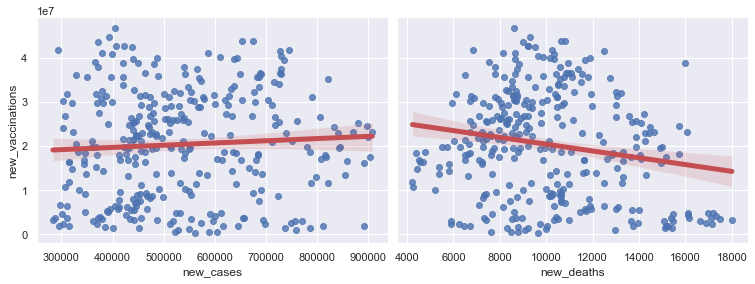

In [139]:
df_vacc_date2 = df_vacc_date.convert_dtypes()
df_vacc_date2['new_cases'] = df_vacc_date2['new_cases'].astype('float64')
df_vacc_date2['new_deaths'] = df_vacc_date2['new_deaths'].astype('float64')
df_vacc_date2['new_vaccinations'] = df_vacc_date2['new_vaccinations'].astype('float64')

sns.pairplot(data=df_vacc_date2[(df_vacc_date2['new_cases'] > 0) & (df_vacc_date2['new_vaccinations'] > 0)],
            x_vars=['new_cases', 'new_deaths'], y_vars=['new_vaccinations'], height=4, aspect=4/3, kind='reg',
            plot_kws={'line_kws': {"color":"r", "lw":5}})


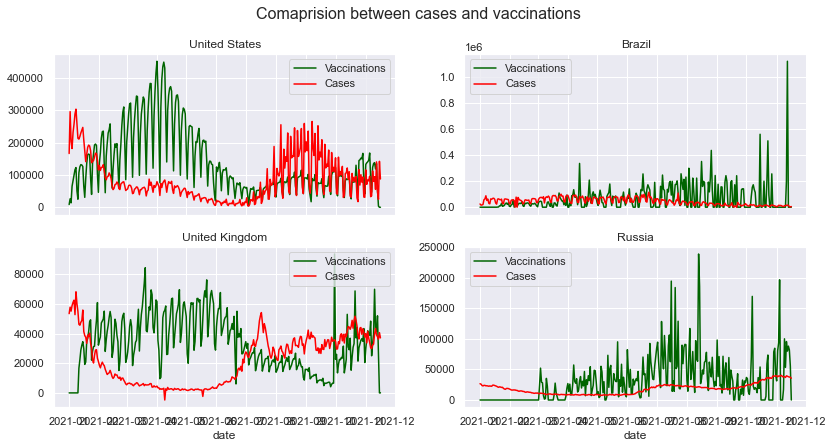

In [138]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)
fig.set_size_inches(13.5, 6.5)
fig.suptitle('Comaprision between cases and vaccinations', fontsize=16)

df_vacc_wl = df_vacc[['location','date', 'new_cases', 'new_deaths', 'new_vaccinations']] #worst locations
df_vacc_wl = df_vacc_wl[df_vacc_wl['location'].isin(worst_locs)]

df_vacc_wl['new_vaccinations'] = df_vacc_wl['new_vaccinations'] / 10

i = j = 0
for country in worst_locs:
    if country != 'Iran':
        sns.lineplot(data=df_vacc_wl[df_vacc_wl['location'] == country], x='date', y='new_vaccinations', label='Vaccinations', color='darkgreen', ax=ax[i][j])
        sns.lineplot(data=df_vacc_wl[df_vacc_wl['location'] == country], x='date', y='new_cases', label='Cases', color='red', ax=ax[i][j])
        ax[i][j].set_title(country)
        ax[i][j].set_ylabel(None)
        j += 1
        if j == 2:
            i += 1
            j=0


C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


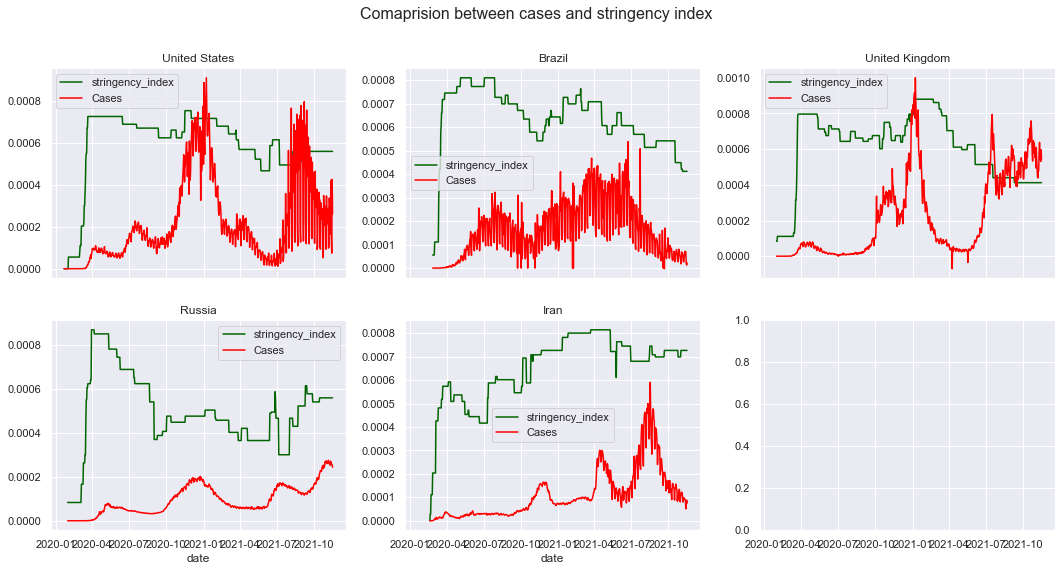

In [181]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True)
fig.set_size_inches(18, 8.5)
fig.suptitle('Comaprision between cases and stringency index', fontsize=16)

df_stri_full = df[['continent', 'location', 'date', 'new_cases', 'new_deaths', 'stringency_index', 'population']]
df_stri_full.fillna(method='ffill', inplace=True)
df_stri_full = df_stri_full[df_stri_full['location'].isin(worst_locs)]
df_stri_full['new_cases'] = df_stri_full['new_cases'] / df_stri_full['population']
df_stri_full['stringency_index'] = df_stri_full['stringency_index'] / 100000


i = j = 0
for country in worst_locs:
    sns.lineplot(data=df_stri_full[df_stri_full['location'] == country], x='date', y='stringency_index', label='stringency_index', color='darkgreen', ax=ax[i][j])
    sns.lineplot(data=df_stri_full[df_stri_full['location'] == country], x='date', y='new_cases', label='Cases', color='red', ax=ax[i][j])
    ax[i][j].set_title(country)
    ax[i][j].set_ylabel(None)
    j += 1
    if j == 3:
        i += 1
        j=0